## Gradient boosting
---
**Elo notes**

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.

Like other boosting methods, gradient boosting combines weak learners into a single strong learner, in an iterative fashion. It is easiest to explain in the least-squares regression setting, where the goal is to learn a model ${\displaystyle F}$ that predicts values $y{\displaystyle {\hat {y}}=F(x)}$, minimizing the mean squared error  ${\displaystyle ({\hat {y}}-y)^{2}}$ to the true values y (averaged over some training set).

At each stage $ {\displaystyle 1\leq m\leq M}  $ of gradient boosting, it may be assumed that there is some imperfect model ${\displaystyle F_{m}}$ (at the outset, a very weak model that just predicts the mean y in the training set could be used). The gradient boosting algorithm does not change $ {\displaystyle F_{m}} $ in any way; instead, it improves on it by constructing a new model that adds an estimator h to provide a better model $ {\displaystyle F_{m+1}(x)=F_{m}(x)+h(x)} F_{m+1}(x)$. The question is now, how to find ${\displaystyle h} $? The gradient boosting solution starts with the observation that a perfect h would imply

${\displaystyle F_{m+1}(x)=F_{m}(x)+h(x)=y} $

or, equivalently,

${\displaystyle h(x)=y-F_{m}(x)} $

Therefore, gradient boosting will fit $h$ to the residual $ {\displaystyle y-F_{m}(x)} $. Like in other boosting variants, each $ {\displaystyle F_{m+1}} $ learns to correct its predecessor ${\displaystyle F_{m}}$. A generalization of this idea to other loss functions than squared error (and to classification and ranking problems) follows from the observation that residuals y − $ {\displaystyle y-F(x)} $ are the negative gradients of the squared error loss function $ {\displaystyle {\frac {1}{2}}(y-F(x))^{2}}$. So, gradient boosting is a gradient descent algorithm; and generalizing it entails "plugging in" a different loss and its gradient.

**Gradient boosting Algorithm**



Input: training set ${\displaystyle \{(x_{i},y_{i})\}_{i=1}^{n},} $ a differentiable loss function ${\displaystyle L(y,F(x)),}$ number of iterations M.

Algorithm:

Initialize model with a constant value:

${\displaystyle F_{0}(x)={\underset {\gamma }{\arg \min }}\sum _{i=1}^{n}L(y_{i},\gamma )}$

For m = 1 to M:

Compute so-called pseudo-residuals:

${\displaystyle r_{im}=-\left[{\frac {\partial L(y_{i},F(x_{i}))}{\partial F(x_{i})}}\right]_{F(x)=F_{m-1}(x)}\quad {\mbox{for }}i=1,\ldots ,n} $

Fit a base learner ${\displaystyle h_{m}(x)}$ to pseudo-residuals, i.e. train it using the training set ${\displaystyle \{(x_{i},r_{im})\}_{i=1}^{n}}$

Compute multiplier ${\displaystyle \gamma _{m}}$ by solving the following one-dimensional optimization problem:

${\displaystyle \gamma _{m}={\underset {\gamma }{\operatorname {arg\,min} }}\sum _{i=1}^{n}L\left(y_{i},F_{m-1}(x_{i})+\gamma h_{m}(x_{i})\right)}$

Update the model:

${\displaystyle F_{m}(x)=F_{m-1}(x)+\gamma _{m}h_{m}(x)}$

Output ${\displaystyle F_{M}(x)}$



**Cost function - Loss function**

In mathematical optimization, statistics, decision theory and machine learning, a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. An objective function is either a loss function or its negative (sometimes called a reward function, a profit function, a utility function, a fitness function, etc.), in which case it is to be maximized.



**Note:** sklearn - n_jobs=-1 allows the process to be run on multiple cores on your computer. Only parallel algorithms such as RandomForest can do that. Boosting is sequential (the current step depends on the residuals from the previous) and does not have that option. n_jobs=-1 is not a hyperparameter.



### Stochastic gradient boosting

• max_features
    Random subsample of features
    Especially good when you have lots of features
    
• sub_sample
    random subset of the training set

### Best practice
Scikit-learn recommends:

Set n_estimators high as possible (3000, 5000, etc.)

Tune all hyper-parameters via grid search

Further optimize n_estimators and learning_rate

● Scikit-learn uses canonical implementation from $R's$ gbm package.

● gbm's documentation provides additional advice on tuning.

You must tune the model for good model performance

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence

from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

% matplotlib inline

In [4]:
boston = load_boston()

In [86]:
feature_names = boston.feature_names

In [5]:
y = boston.target
X = boston.data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [7]:
features = boston.feature_names

In [8]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=1)

In [9]:
gboost = GradientBoostingRegressor(learning_rate=0.1,
                                 loss='ls',
                                 n_estimators=100,
                                 random_state=1)

In [10]:
aboost = AdaBoostRegressor(DecisionTreeRegressor(),
                          learning_rate=0.1,
                          loss='linear',
                          n_estimators=100,
                          random_state=1)

In [11]:
def cv_score(models, X, y):
    scores=[]
    for model in models:
        cv_score = {}
        score_methods = ['neg_mean_squared_error', 'r2']
        for method in score_methods:
            cv_score[method] = abs(cross_val_score(model, X, y,
                                                scoring=method,
                                                n_jobs = -1).mean())
        scores.append(cv_score)
    return scores
            

In [12]:
models_name = ['RandomForestRegressor',
              'GradientBoostingRegressor',
              'AdaBoostRegressor']
models = [rf, gboost, aboost]
zip(models_name, cv_score(models, X_train, y_train))

[('RandomForestRegressor',
  {'neg_mean_squared_error': 10.320121093569188, 'r2': 0.86910528797243847}),
 ('GradientBoostingRegressor',
  {'neg_mean_squared_error': 8.8465953307707181, 'r2': 0.88859680828246645}),
 ('AdaBoostRegressor',
  {'neg_mean_squared_error': 9.7304608439285047, 'r2': 0.87805839027916621})]

In [13]:
# tunning gradient boosting's parameter to learning_rate=1, it will negatively affect the score.
gboost_ = GradientBoostingRegressor(learning_rate=1,
                                   loss='ls',
                                   n_estimators=100,
                                   random_state=1)

print cv_score([gboost_], X_train, y_train)

gboost_.fit(X_train, y_train)
y_hat = gboost_.staged_predict(X_train)

[{'neg_mean_squared_error': 22.289380229237612, 'r2': 0.71265602102041037}]


---
**Graphing**

In [15]:
def staging_mse_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    learning_rate = model.n_estimators
    # train set
    y_predict_ = model.staged_predict(X_train)
    mse_score_ =  []
    for y_hat_ in y_predict_:
        mse_score_.append(mean_squared_error(y_train, y_hat_))
        
    # test set
    y_predict = model.staged_predict(X_test)
    mse_score = []
    for y_hat in y_predict:
        mse_score.append(mean_squared_error(y_test, y_hat))
    
    
    # Plot train
    plt.plot(range(learning_rate), mse_score_, linestyle='--', label='{} Train = learning rate: {}'.format(model.__class__.__name__, model.learning_rate))
    # Plot test
    plt.plot(range(learning_rate), mse_score, label='{} Test = learning rate: {}'.format(model.__class__.__name__, model.learning_rate))
    
    plt.ylabel('MSE')
    plt.xlabel('Iterations')
    plt.legend()
    

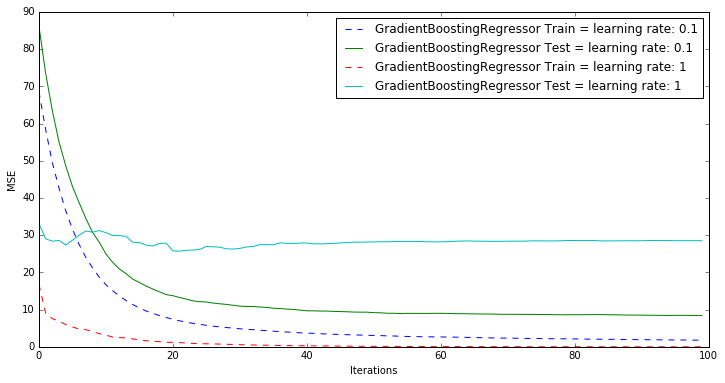

In [16]:
plt.figure(figsize=(12, 6))
staging_mse_score(gboost, X_train, X_test, y_train, y_test)
staging_mse_score(gboost_, X_train, X_test, y_train, y_test)
plt.show()

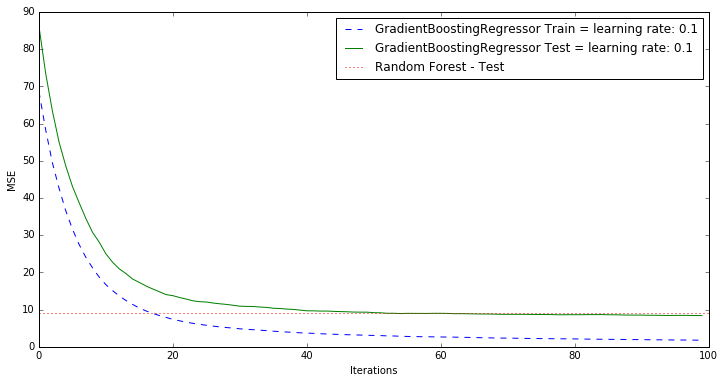

In [17]:
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

plt.figure(figsize=(12, 6))
staging_mse_score(gboost, X_train, X_test, y_train, y_test)

plt.axhline(y= mean_squared_error(y_test, y_predict), linestyle=':', linewidth=1,
           color='r', label='Random Forest - Test')
plt.legend()
plt.show()

---
#### Grid Search to find the best tunning parameters for models Random Forest, Gboosting, Adaboosting

2 . 3 . 3 . 3 . 1 . 4 . 1 : We are trying each of these possibilities!

**Random Forest**

In [18]:
# Initial parameter evaluation with gridsearch
# n_estimators = number of trees grown

rf_gridsearch_parameters = {'max_depth':[3, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [1, 2, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'bootstrap':[True],
                         'n_estimators': [10, 20, 40, 100],
                         'random_state': [1],
                         'n_jobs':[-1]}

In [19]:
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                            rf_gridsearch_parameters,
                            n_jobs=-1,
                            verbose=True,
                            scoring='neg_mean_squared_error')

rf_gridsearch.fit(X_train, y_train)
print 'Best Parameters:', rf_gridsearch.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  1.3min finished


Best Parameters: {'n_jobs': -1, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 40, 'min_samples_split': 1, 'random_state': 1, 'max_features': None, 'max_depth': None}


In [32]:
rf_gridsearch.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'n_estimators': 40,
 'n_jobs': -1,
 'random_state': 1}

In [35]:
rf_gridsearch.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=1, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [62]:
rf_best = rf_gridsearch.best_estimator_

**Gradient Boosting Regressor**

In [21]:
# Initial parameter evaluation with gridsearch

gboost_gridsearch_parameters = {'learning_rate': [0.001, 0.01, .1, 1],
                               'max_depth': [2, 3, None],
                                'min_samples_leaf': [1, 2, 3],
                                'max_features': ['sqrt', 'log2', None],
                                'n_estimators': [10, 20, 40, 100],
                                'random_state': [1]}     

In [29]:
gboost_gridsearch = GridSearchCV(GradientBoostingRegressor(),
                                gboost_gridsearch_parameters,
                                n_jobs=-1,
                                verbose=True,
                                scoring='neg_mean_squared_error')


gboost_gridsearch.fit(X_train, y_train)



Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   10.7s finished


In [36]:
gboost_gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'random_state': 1}

In [37]:
gboost_gridsearch.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

In [63]:
gboost_best = gboost_gridsearch.best_estimator_

**Ada Boosting Regressor**

In [73]:
adaboost_gridsearch_parameters = {'learning_rate': [0.001, 0.01, .1, 1, 2],
                                  'n_estimators': [10, 20, 40, 100],
                                 'loss': ['linear', 'square', 'exponential'] } 

In [74]:
# Initial parameter evaluation with gridsearch
adaboost_gridsearch = GridSearchCV(AdaBoostRegressor(),
                                adaboost_gridsearch_parameters,
                                n_jobs=-1,
                                verbose=True,
                                scoring='neg_mean_squared_error')

adaboost_gridsearch.fit(X_train, y_train)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 40, 100], 'loss': ['linear', 'square', 'exponential'], 'learning_rate': [0.001, 0.01, 0.1, 1, 2]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=True)

In [75]:
adaboost_gridsearch.best_params_

{'learning_rate': 2, 'loss': 'linear', 'n_estimators': 100}

In [76]:
adaboost_gridsearch.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=2, loss='linear',
         n_estimators=100, random_state=None)

In [77]:
adaboost_best = adaboost_gridsearch.best_estimator_

---

In [78]:
models_name = ['RandomForestRegressor',
              'GradientBoostingRegressor',
              'AdaBoostRegressor']
models = [rf_best, gboost_best, adaboost_best]
zip(models_name, cv_score(models, X_train, y_train))

[('RandomForestRegressor',
  {'neg_mean_squared_error': 10.222602823267922, 'r2': 0.8701851714173503}),
 ('GradientBoostingRegressor',
  {'neg_mean_squared_error': 8.8465953307707181, 'r2': 0.88859680828246645}),
 ('AdaBoostRegressor',
  {'neg_mean_squared_error': 13.023536899342664, 'r2': 0.8373457012085227})]

---

In [80]:
gb_hat = gboost_best.predict(X_test)

In [81]:
mse_gbtest = mean_squared_error(gb_hat, y_test)

In [82]:
mse_gbtest

8.3954816729859978

In [83]:
r2_gbtest = r2_score(gb_hat, y_test)

In [84]:
r2_gbtest

0.88832229582972355

---
### Feature Importance

In [89]:
feature_importance = pd.Series(gboost_best.feature_importances_, index=feature_names)
feature_importance = feature_importance.sort_values()
#feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

RM         0.190972
DIS        0.153736
LSTAT      0.130208
B          0.109744
AGE        0.093605
CRIM       0.072551
NOX        0.062746
TAX        0.058318
INDUS      0.056279
PTRATIO    0.055421
RAD        0.013082
CHAS       0.002806
ZN         0.000532
dtype: float64

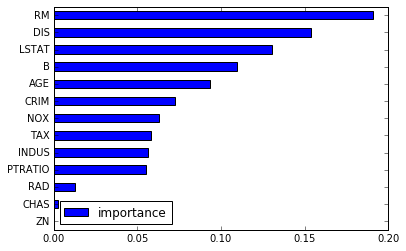

In [90]:
feature_score = pd.DataFrame({'importance':gboost_best.feature_importances_}, index=feature_names)
feature_score = feature_score.sort_values('importance')
feature_score.plot(kind = 'barh');

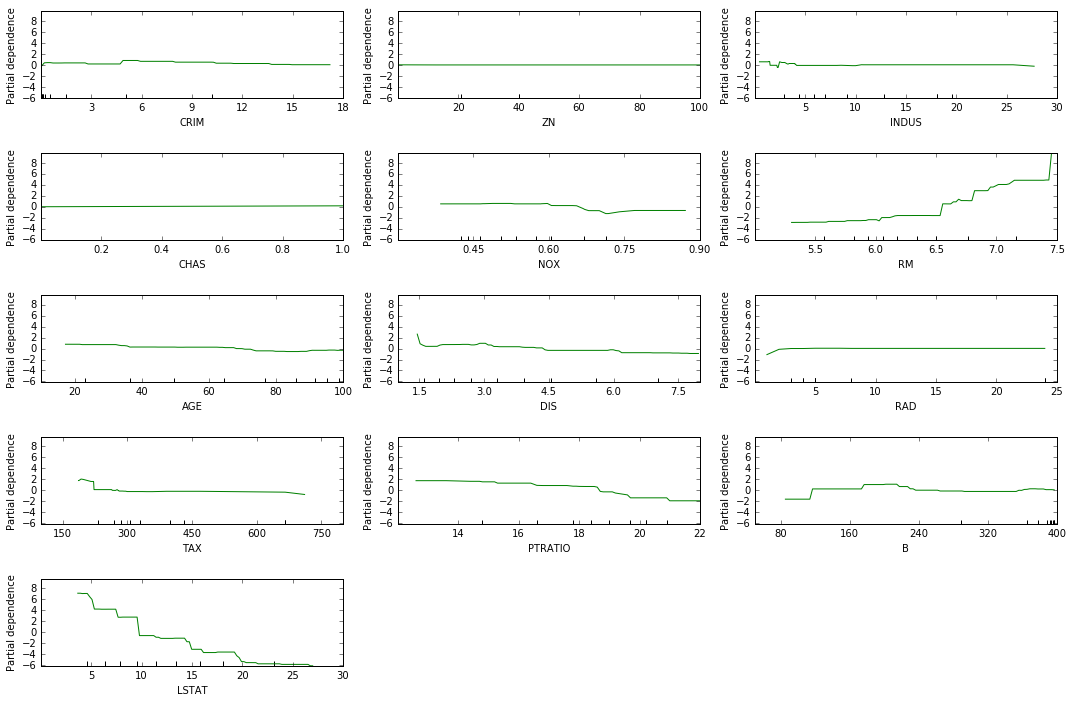

In [93]:
fig, axs = plot_partial_dependence(gboost_best, X_train, range(X.shape[1]), feature_names=feature_names, figsize=(15, 10))
fig.tight_layout()